# Demo No. 4 - Spots

This demo will demonstrate how to generate spots on the surface of the given component.

## Generating spot metadata

Before the standard procedure of defining the components and the binary system itself, lets first specify our spots on the primary component.

In [3]:
spots_primary = [
    #  Spot 1
    {"longitude": 0,
     "latitude": 45,
     "angular_radius": 27,
     "temperature_factor": 1.05,
     "discretization_factor": 2,
    },
    #  Spot 2
    {"longitude": 30,
     "latitude": 30,
     "angular_radius": 15,
     "temperature_factor": 0.98,
    },
    #  Spot 3
    {"longitude": 40,
     "latitude": 50,
     "angular_radius": 15,
     "temperature_factor": 1.02,
    },
    #  Spot 4
    {"longitude": 0,
     "latitude": 50,
     "angular_radius": 8,
     "temperature_factor": 0.98,
    },
]

where spots on given component are defined by a list of dictionaries for each spot. Each spot is defined by 4 parameters `longitude`, `latitude`, `angular_radius` and `temperature_factor` = $T_{spot}/T_{star}$. Discretization factor of the each spot can be specifyied but by default they are set automatically based on discretization factor of the parent star. Order in which the spots is important in case of overlaping spots, since the spot with higher index will lay on top of the overlapping counterpart with lower index. 

## Generating a binary system

The binary system and its components will be generated in very similar fashion to previous exercises with small addition to component(s) with spots:

Now we can build a system for given photometric phase the same way as in the previous demo:

In [4]:
from elisa.binary_system.system import BinarySystem
from elisa.base.star import Star
from astropy import units as u
from elisa.binary_system.container import OrbitalPositionContainer


primary = Star(
    mass=2.15 * u.solMass,
    surface_potential=3.6,
    synchronicity=1.0,
    t_eff=10000 * u.K,
    gravity_darkening=1.0,
    discretization_factor=4, 
    albedo=0.6,
    metallicity=0.0,
    spots = spots_primary  # here we specified the spots present on the primary component
)

secondary = Star(
    mass=1.2 * u.solMass,
    surface_potential=4.0,
    synchronicity=1.0,
    t_eff=7000 * u.K,
    gravity_darkening=1.0,
    # discretization_factor=20,
    albedo=0.6,
    metallicity=0,  # similarly, spots can be added to the secondary component as well
)

bs = BinarySystem(
    primary=primary,
    secondary=secondary,
    argument_of_periastron=58 * u.deg,
    gamma=-30.7 * u.km / u.s,
    period=2.5 * u.d,
    eccentricity=0.2,
    inclination=85 * u.deg,
    primary_minimum_time=2440000.0 * u.d,
    phase_shift=0.0,
)

2019-11-05 14:51:26,493 - 21699 - BinarySystem - INFO: initialising object BinarySystem
2019-11-05 14:51:26,501 - 21699 - BinarySystem - INFO: setting discretization factor of secondary component to 6.23 as a according to discretization factor of the primary component 


## Data access and visualization

Initially, we will initialize orbital position container and calculate geometry of the components:

In [6]:
phase = 0.2

position = bs.calculate_orbital_motion(phase)[0]  
orbital_position_container = OrbitalPositionContainer.from_binary_system(bs, position)
orbital_position_container.build()

Similarly, points, faces and surface parameters for the spots are stored in separate subcontainers that are specified by the spot indices which are given by the order in which the spots were specified:

In [9]:
orbital_position_container.primary.spots[0].points  # this will return surface points of the Spot 1

array([[ 0.09130025,  0.        ,  0.31094009],
       [ 0.22058152,  0.02883421,  0.24412455],
       [ 0.21396887,  0.02136667,  0.24998013],
       ..., 
       [ 0.25279573, -0.04637867,  0.2121208 ],
       [ 0.26903991, -0.04036591,  0.19532842],
       [ 0.28110206, -0.02339647,  0.18297247]])

In [10]:
orbital_position_container.primary.spots[1].faces  # this will return faces of the Spot 2

array([[22, 38, 23],
       [22, 37, 38],
       [ 6, 14, 13],
       [ 6, 14, 15],
       [ 6,  1, 15],
       [11, 22, 10],
       [11, 22, 23],
       [39, 38, 23],
       [26, 13, 25],
       [26, 14, 13],
       [28, 46, 45],
       [17, 29, 16],
       [12, 13, 25],
       [12, 25, 24],
       [40, 25, 24],
       [12,  5, 13],
       [ 6,  5, 13],
       [21, 22, 10],
       [22, 36, 37],
       [21, 22, 36],
       [18,  8, 17],
       [30, 17, 31],
       [18, 17, 31],
       [27, 26, 14],
       [27, 44, 45],
       [27, 28, 45],
       [28, 14, 15],
       [27, 28, 14],
       [30, 17, 29],
       [12, 23, 24],
       [39, 23, 24],
       [40, 39, 24],
       [ 0,  2,  3],
       [ 0,  6,  1],
       [ 0,  2,  1],
       [ 7,  3,  8],
       [ 7,  8, 17],
       [ 7,  2,  3],
       [ 7, 17, 16],
       [18,  8, 19],
       [12, 11,  5],
       [12, 11, 23],
       [35, 21, 36],
       [35, 34, 20],
       [35, 20, 21],
       [ 9,  3,  8],
       [ 9,  8, 19],
       [ 9, 2

In [13]:
# this will return temperatures for each face inside the Spot 3
orbital_position_container.primary.spots[2].temperatures

array([ 10232.21659181,  10221.58443647,  10190.27935704,  10196.72050732,
        10232.46718576,  10220.722989  ,  10304.0878023 ,  10227.26835602,
        10216.11965611,  10263.3791383 ,  10251.25126984,  10322.62739653,
        10180.67804185,  10195.72020922,  10223.10134822,  10349.43324927,
        10325.0677603 ,  10333.88462425,  10157.77089427,  10147.49965819,
        10164.88327492,  10160.74870231,  10250.15121248,  10238.97750333,
        10246.46532697,  10258.68103419,  10254.79325915,  10288.12226447,
        10277.53001433,  10272.40811113,  10283.47706824,  10290.4097024 ,
        10255.28216776,  10266.27301536,  10303.49343504,  10293.78693694,
        10288.19026739,  10275.68784472,  10263.83329722,  10348.12491653,
        10222.03197488,  10159.17139747,  10197.92286045,  10174.35072296,
        10202.90611007,  10191.77210086,  10255.97026461,  10267.27783696,
        10234.77291411,  10221.71640302,  10200.07669641,  10285.29936227,
        10281.32865836,  

Finally, lets visualize the spotted surface in the form of 3D plot:

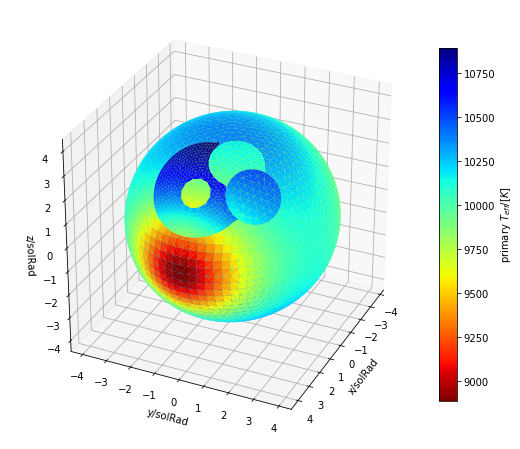

In [15]:
bs.plot.surface(phase=0.05,
                components_to_plot='primary',
                colormap='temperature',
                axis_unit=u.solRad,
                inclination=60,
               )